# Classification Predict TeamJS1 Solutions

© Explore Data Science Academy

**Climate Change Belief Analysis**
---
### Honour Code

We {**TeamJS1**}, confirm - by submitting this document - that the solutions in this notebook are a result of our work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

## Introduction: Climate Change Belief

<p align="justify" > Earth’s climate is undergoing changes never seen before by humans. Studying climate change will help us understand why global temperatures continue to rise, how the climate affects us, and how we can tackle this challenge before things get much worse. It is imperative to understand climate change for us to plan accordinlgy. Our understanding of the climate can help us predict how much rain will fall next winter as well as how much sea levels will rise as temperatures rise. Finding out what people think about climate change and whether they consider it to be a real threat is important.


### Predict Overview:Climate change

Many companies are built around lessening one’s environmental impact or carbon footprint and they would like to determine how people perceive climate change and whether or not they believe it is a real threat. Our company has been awarded a contract to:

- 1. Analyse the supplied data;
- 2. Identify potential errors in the data and clean the existing data set;
- 3. Determine if additional features can be added to enrich the data set;
- 4. Build a model that is capable of predicting the Climate Change sentiments in a given Twitter dataset;
- 5. Evaluate the accuracy of the best machine learning model;
- 6. Determine what features were most important in the model’s prediction decision, and
- 7. Explain the inner working of the model to a non-technical audience.

### Problem statement: 
Our tweeter data allows us to determine whether people in the tweeter data believe climate change is a threat given the ever-changing climate and global changes.

### Our Task: The classification of tweets
To create a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. Therefore, a robust solution for this task will allow companies to access a wealth of consumer sentiment that spans several demographic and geographical categories - so that their marketing strategies can be better informed. 

<div align="center" style="width: 800px; font-size: 100%; text-align: center; margin: 0 auto">
<img src="https://dnrec.alpha.delaware.gov/wp-content/uploads/sites/2/2020/02/climate-word-map.jpg"
     
Climate Change  Photo by <a href="https://dnrec.alpha.delaware.gov/coastal-programs/planning-training/adapting-to-sea-level-rise/climate-change-perceptions/"> Delaware </a> 
</div>

 ### Key Objectives:
    
1.   To analyse the tweets of Individual Twitter account in term of Sentiments;
2.   Identify individual tweets as news, pro, neutral and anti-climate change; & 
3.   Calculate the f1 score of the sentiments.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


In this section we are importing all the relavant packages which will be used for analysis, data cleaning and modeling.

In [98]:
!!pip install nlppreprocess

['Unable to create process using \'C:\\Users\\Selaelo Debang\\anaconda3\\python.exe "C:\\Users\\Selaelo Debang\\anaconda3\\Scripts\\pip-script.py" install nlppreprocess\'']

In [99]:
pip install comet_ml

In [100]:
import comet_ml 
from comet_ml import Experiment
# Create an experiment with your api key
experiment = Experiment(
    api_key="RSRx0yRP4gknZ8Z9AJc9Vng3s",
    project_name="general",
    workspace="debangselaelo",
)


COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/debangselaelo/general/3314217f67164f5dac22cd7df936b73b
COMET INFO:   Parameters:
COMET INFO:     C                        : 1.0
COMET INFO:     alpha                    : 1.0
COMET INFO:     bootstrap                : True
COMET INFO:     ccp_alpha                : 0.0
COMET INFO:     class_prior              : 1
COMET INFO:     class_weight             : 1
COMET INFO:     criterion                : gini
COMET INFO:     dual                     : True
COMET INFO:     fit_intercept            : True
COMET INFO:     fit_prior                : True
COMET INFO:     intercept_scaling        : 1
COMET INFO:     l1_ratio                 : 1
COMET INFO:     loss                     : squared_hinge
COMET INFO:     max_depth                : 1
COMET INFO:  

In [101]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Libraries for data preparation and model building
# Import the scaling module
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from PIL import Image
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Import train/test split module
from sklearn.model_selection import train_test_split
#Modelling Libraries
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#NLP Libraries
import nltk
import pickle
import string
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
from sklearn.svm import LinearSVC
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
import spacy
spacy.cli.download("en_core_web_sm")
from spacy.util import compounding
from spacy.util import minibatch
from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok

# set plot style
sns.set()

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


Lets load the data to see what we are dealing with.

In [102]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test_with_no_labels.csv')

In [103]:
test_df.head()

message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In this section, we will be exploring the data by analysing it using visual techniques.

In [104]:
#Checking the shape of the train set
train_df.shape

(15819, 3)

We can see that our train set has got 15819 rows and 3 columns

In [105]:
#Checking the data types of our training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


From the output above we can see that we have two different data types; Numerical and object. 

In [106]:
#Checking for null values in train dataset
train_df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

We can see that there are nonull values in the train dataset

In [107]:
#Checking for decriptive statistics in the train dataset
train_df.describe()

sentiment        tweetid
count  15819.000000   15819.000000
mean       0.917504  501719.433656
std        0.836537  289045.983132
min       -1.000000       6.000000
25%        1.000000  253207.500000
50%        1.000000  502291.000000
75%        1.000000  753769.000000
max        2.000000  999888.000000

We can see that the column sentiment is moderately skewed to the negative direction while the column tweetid is fairly symmetrical

In [108]:
train_df.kurtosis()


C:\Users\Selaelo Debang\AppData\Local\Temp\ipykernel_11944\1809764310.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.kurtosis()


sentiment    0.122976
tweetid     -1.193356
dtype: float64

C:\Users\Selaelo Debang\AppData\Local\Temp\ipykernel_11944\3303286591.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.kurtosis().plot()


<AxesSubplot:>

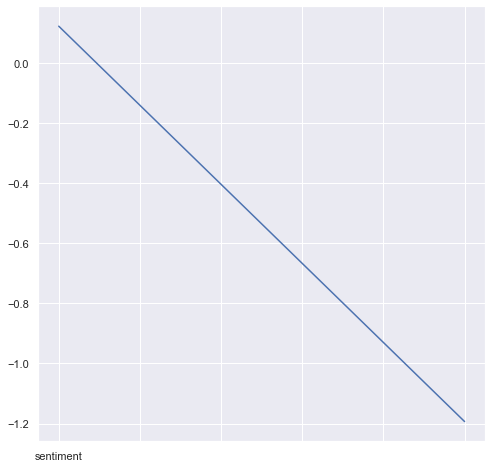

In [109]:
plt.figure(figsize=(8,8))

train_df.kurtosis().plot()

From the above figure we can infer there are no outliers in our dataset

In [110]:
#Variable assignment; predictor and target variables
X = train_df['message']
y = train_df['sentiment']

### Data Distribution
Now, let's do a quick analysis of the distribution of observations across our labels.

In [111]:
# Separate minority and majority classes
anti = train_df[y==-1]
neutral = train_df[y==0]
pro = train_df[y==1]
news = train_df[y==2]
y.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

We can see that 8530 tweets are believe, 3640 tweets are factual news about climate change, 2353 neither support nor refutes, and 1296 tweets do not believe in climate change.

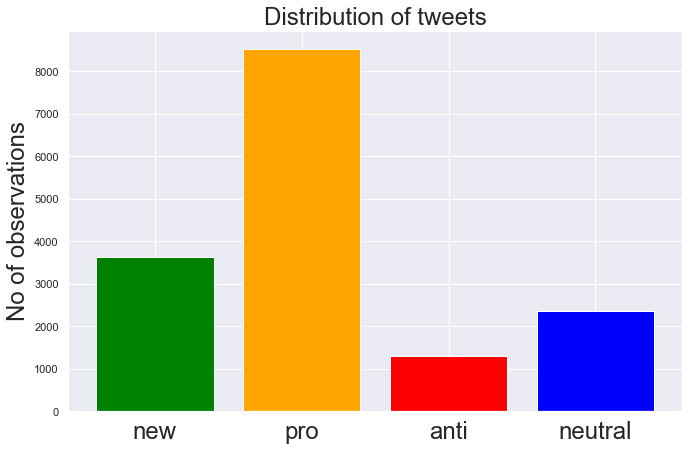

In [112]:
# Get all possible labels
plt.figure(figsize=(11,7))
labels = y.unique()
heights = [len(anti),len(neutral),len(pro),len(news)]
plt.bar(labels,heights,color= ["red", "blue", "orange", "green"])
plt.title("Distribution of tweets", fontsize = 24)
plt.ylabel("No of observations", fontsize = 24)
plt.xticks(labels,['anti', 'neutral', 'pro', 'new'], fontsize = 24)
plt.show()


The bar graph above paints a clearer picture of the distribution of tweets and reveals that the train dataset is imbalanced towards pro climate change activists. Due to this imbalance there is a risk of overfitting our model. Therefore, we shall deal with this problem at a later stage.

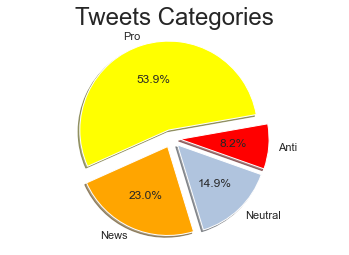

In [113]:
# Checking for the percentages among the tweets
labels = list( { 1: "Pro", 2: "News", 0: "Neutral", -1: "Anti"}.values())
#my_labels = 'Tasks Pending','Tasks Ongoing','Tasks Completed'
my_colors = ['yellow','orange','lightsteelblue', 'red']
my_explode = tuple([0.1] * len(labels)) #(0, 0.1, 0)
plt.pie(train_df['sentiment'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=10, shadow = True, colors=my_colors, explode=my_explode)
plot_size = plt.rcParams["figure.figsize"]
plot_size[0] = 13
plot_size[1] = 8
plt.title('Tweets Categories', fontsize = 24)
plt.axis('equal')
plt.show()

We can see from the pie chat above that 54% of the data is positive reaction to climate change, whilst negative reactions amount to 8%. News account for 23% of the data, and neutral tweets are 15%.

#### Now lets check for interdependency among predictor variables

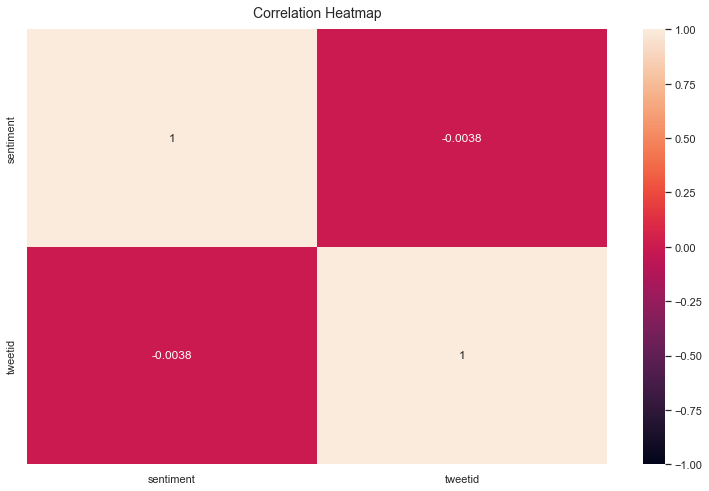

In [114]:
#Correlation heatmap
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

From our heatmap above there is no indication of high correlation amongst our variables

In [115]:
#Checking for the symmetry of our train dataset distribution
train_df.skew()

C:\Users\Selaelo Debang\AppData\Local\Temp\ipykernel_11944\3905089230.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.skew()


sentiment   -0.683959
tweetid     -0.008471
dtype: float64

<AxesSubplot:title={'center':'Density curve'}, xlabel='message', ylabel='Density'>

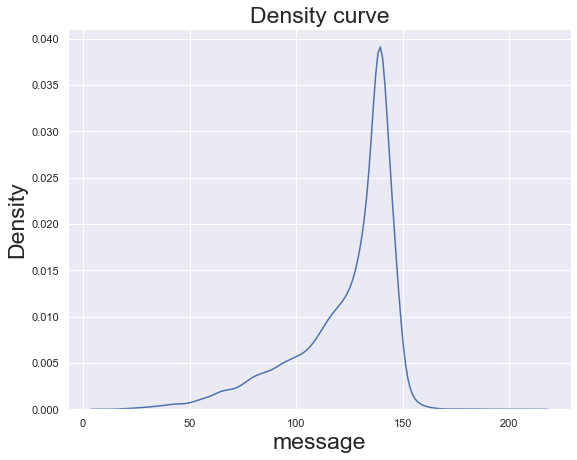

In [116]:
## Using KDEplot let us visualise the message column
plt.figure(figsize=(9,7))
lenghth = train_df["message"].str.len()
plt.title("Density curve", fontsize = 23)
plt.xlabel("message", fontsize = 23)
plt.ylabel("Density", fontsize = 23)
sns.kdeplot(lenghth)

The curve is skewed to the left side of the distribution because that is where the most values are located. It is also lowest near the ends of the distribution because fewer message take on those values

## Word Cloud Visualization

Here we are presenting the Visualisations of Words appearing in our tweets.

(-0.5, 399.5, 199.5, -0.5)

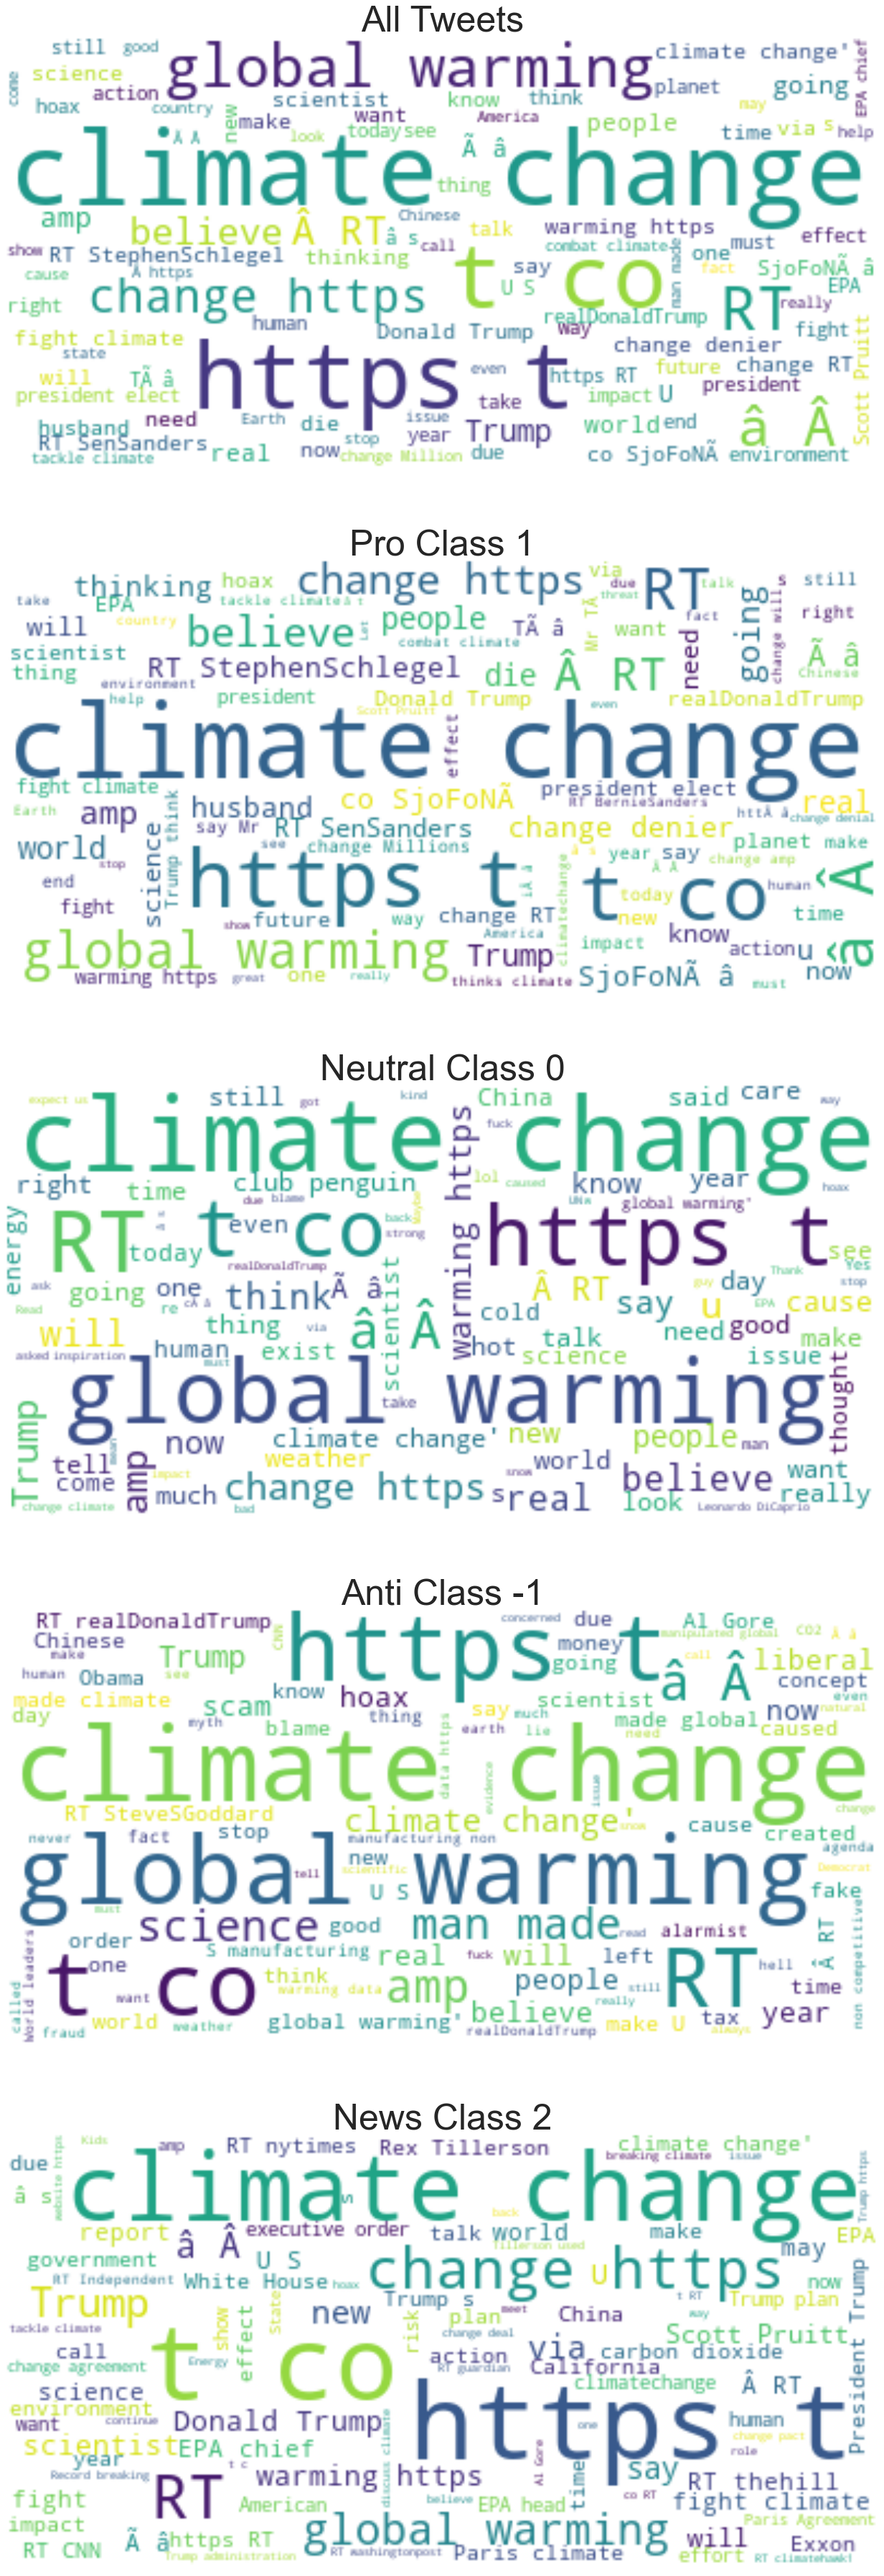

In [117]:
# visualising the messages with word cloud
senti1 = train_df[train_df['sentiment'] == 1]
senti0 = train_df[train_df['sentiment'] == 0]
senti_neg1 = train_df[train_df['sentiment'] == -1]
senti2 = train_df[train_df['sentiment'] == 2]
tweet_All = " ".join(review for review in train_df.message)
tweet_senti1 = " ".join(review for review in senti1.message)
tweet_senti0 = " ".join(review for review in senti0.message)
tweet_senti_neg1 = " ".join(review for review in senti_neg1.message)
tweet_senti2 = " ".join(review for review in senti2.message)

fig, ax = plt.subplots(5, 1, figsize=(65, 65))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100,
                          background_color="white").generate(tweet_All)

wordcloud_1 = WordCloud(max_font_size=50, max_words=100,
                        background_color="white").generate(tweet_senti1)

wordcloud_0 = WordCloud(max_font_size=50, max_words=100,
                        background_color="white").generate(tweet_senti0)

wordcloud_neg1 = WordCloud(max_font_size=50, max_words=100,
                           background_color="white").generate(tweet_senti_neg1)

wordcloud_2 = WordCloud(max_font_size=50, max_words=100,
                        background_color="white").generate(tweet_senti2)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=50)
ax[0].axis('off')
ax[1].imshow(wordcloud_1, interpolation='bilinear')
ax[1].set_title('Pro Class 1', fontsize=50)
ax[1].axis('off')
ax[2].imshow(wordcloud_0, interpolation='bilinear')
ax[2].set_title('Neutral Class 0', fontsize=50)
ax[2].axis('off')
ax[3].imshow(wordcloud_neg1, interpolation='bilinear')
ax[3].set_title('Anti Class -1', fontsize=50)
ax[3].axis('off')
ax[4].imshow(wordcloud_2, interpolation='bilinear')
ax[4].set_title('News Class 2', fontsize=50)
ax[4].axis('off')


- This **Wordcloud Visualization** shows the top 100 sentiment and message words.columns. Generally, the larger the word, the more frequently it appears in the message column. 

- #### All tweet message

`Climate change, https, CO, RT and global warming` are the most prevalent words in the all tweets dataframe. Retweets are listed as "RT", and Hyper links on the tweet are listed as "https".

- #### Tweets under sentiment 1

The words `climate change, https, RT,CO Believe, thinking` are popular in Pro-sentiment.

- #### Tweets under sentiment 0

The words `global warming, climate change, Https,Rt, believe, think, real, people` are popular in Neutral sentiment. This may signal indifference to climate change validity or an apathetic attitude.

- #### Tweets under sentiment -1 

The words `Co, RT, Https, Trump, man made, global warming` are popular in  Anti-sentiment. The words `liberal`,`was created`,`created by`,`fake`,`man made` and `crime` are commonly associated with negative sentiments. Words like `hoax, Chinese, manipulated` show a belief in conspiracy theories.

- #### Tweets under sentiment 2

The words `Co, RT, Https, Trump, global warming, Scientists, researchers, ÈPA and reports` are popular in News sentiments. Climate change is believed to be caused by humans, according to this viewpoint. It could be due to the frequency of being influenced by media `reports` that many people rely on them for validation.

- #### Retweets

In the above dataframe, there are many retweets. Tweets that are retweeted are those that are reposted by different users on Twitter. Donald `Trump` is a common subject in all classes due to his administration's "controversial" stance on global warming, which was communicated through Twitter during his presidency.

### Hashtags
Here we are counting and visualising the positive and negative hashtags.

In [118]:
#How many hashtags are there in a tweet?

'''
this function extract hashtags in tweet message
and returns the hashtags
''' 
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags
# extracting hashtags from positive/negative tweets

HT_positive = hashtag_extract(train_df['message'][train_df['sentiment'] == 1])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train_df['message'][train_df['sentiment'] == -1])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])


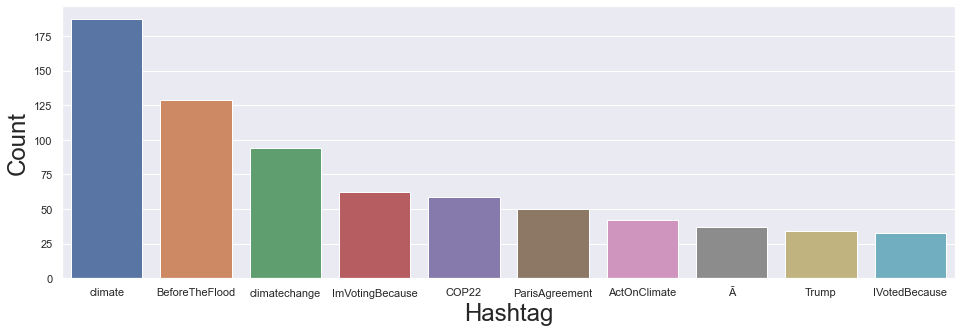

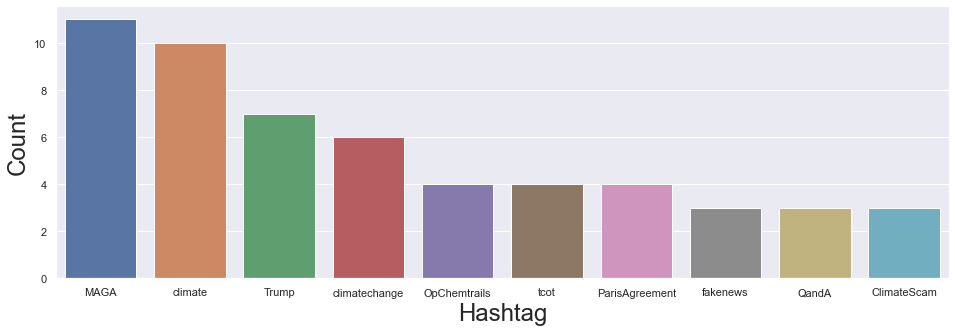

In [119]:
#Positive hastags are pro climate change
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xlabel("Hashtag", fontsize = 24)
plt.ylabel("Count", fontsize = 24)
plt.show()


#Negative hashtags are anti climate change
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xlabel("Hashtag", fontsize = 24)
plt.ylabel("Count", fontsize = 24)
plt.show()

- **Positive climate change hashtags** are shown on the first graph, whereas **negative climate change hashtags** are shown on the second graph. They both illustrate the ten most popular hashtags. 
- Among the positive hashtags, `Climate` is the most common, however `BeforeTheFlood`, `ParisAgreement`, `ActOnClimate` are also noteworthy. Climate change believers may view these hashtags as a sign of how serious their beliefs are.
- Anti-climate change graphs often include MAGA as one of the most common words, which stands for "Make America Great Again" and is commonly associated with former U.S.A President Donald Trump. `Trump`, `fakenews`, `ClimateScam` were also common hashtags. We also noticed a hashtag called `ParisAgreement` on how it would appear on the anti hashtags. We found out that Donald Trump formally withdrew from the `ParisAgreement` in order to continue his campaign to "Make America Great Again."


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In this section we will be cleaning our data so that it is usable by our models.

In [120]:
# Removing punctuations and unwanted characters present in the messages, and making the messages lowercase

def cleaning(text):
    """
    The Function makes text lowercase,removes links,
    punctuation(!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~)
    and words containing numbers.

    Parameters:
    argument1(object):It takes the text and converts all it to lowercases
    argument2(object):It takes all the special characters and removes them
    argument3(object):It takes the text and removes all numeric values
    argument4(object):It takes text and expand shortened words

    Returns:
    Object full word without the special characters and numeric values,
    all in lower case

    """
    contractions_dict = {"ain't": "am not / are not / is not / has not /have not",
                         "aren't": "are not / am not", "can't": "cannot",
                         "can't've": "cannot have",
                         "'cause": "because", "could've": "could have",
                         "couldn't": "could not",
                         "couldn't've": "could not have", "didn't": "did not",
                         "doesn't": "does not",
                         "don't": "do not", "hadn't": "had not",
                         "hadn't've": "had not have",
                         "hasn't": "has not", "haven't": "have not",
                         "he'd": "he had / he would",
                         "he'd've": "he would have",
                         "he'll": "he shall / he will",
                         "he'll've": "he shall have / he will have",
                         "he's": "he has / he is",
                         "how'd": "how did", "how'd'y": "how do you",
                         "how'll": "how will",
                         "how's": "how has / how is / how does",
                         "I'd": "I had / I would",
                         "I'd've": "I would have", "I'll": "I shall / I will",
                         "I'll've": "I shall have / I will have",
                         "I'm": "I am", "I've": "I have",
                         "isn't": "is not", "it'd": "it had / it would",
                         "it'd've": "it would have",
                         "it'll": "it shall / it will",
                         "it'll've": "it shall have / it will have",
                         "it's": "it has / it is", "let's": "let us",
                         "ma'am": "madam", "mayn't": "may not",
                         "might've": "might have", "mightn't": "might not",
                         "mightn't've": "might not have",
                         "must've": "must have", "mustn't": "must not",
                         "mustn't've": "must not have",
                         "needn't": "need not",
                         "needn't've": "need not have",
                         "o'clock": "of the clock",
                         "oughtn't": "ought not",
                         "oughtn't've": "ought not have",
                         "shan't": "shall not",
                         "sha'n't": "shall not",
                         "shan't've": "shall not have",
                         "she'd": "she had / she would",
                         "she'd've": "she would have",
                         "she'll": "she shall / she will",
                         "she'll've": "she shall have / she will have",
                         "she's": "she has / she is",
                         "should've": "should have",
                         "shouldn't": "should not",
                         "shouldn't've": "should not have",
                         "so've": "so have",
                         "so's": "so as / so is",
                         "that'd": "that would / that had",
                         "that'd've": "that would have",
                         "that's": "that has / that is",
                         "there'd": "there had / there would",
                         "there'd've": "there would have",
                         "there's": "there has / there is",
                         "they'd": "they had / they would",
                         "they'd've": "they would have",
                         "they'll": "they shall / they will",
                         "they'll've": "they shall have / they will have",
                         "they're": "they are",
                         "they've": "they have", "to've": "to have",
                         "wasn't": "was not",
                         "we'd": "we had / we would",
                         "we'd've": "we would have",
                         "we'll": "we will", "we'll've": "we will have",
                         "we're": "we are", "we've": "we have",
                         "weren't": "were not",
                         "what'll": "what shall / what will",
                         "what'll've": "what shall have / what will have",
                         "what're": "what are", "what's": "what has / what is",
                         "what've": "what have",
                         "when's": "when has / when is",
                         "when've": "when have",
                         "where'd": "where did",
                         "where's": "where has / where is",
                         "where've": "where have",
                         "who'll": "who shall / who will",
                         "who'll've": "who shall have / who will have",
                         "who's": "who has / who is", "who've": "who have",
                         "why's": "why has / why is", "why've": "why have",
                         "will've": "will have",
                         "won't": "will not", "won't've": "will not have",
                         "would've": "would have",
                         "wouldn't": "would not",
                         "wouldn't've": "would not have",
                         "y'all": "you all", "y'all'd": "you all would",
                         "y'all'd've": "you all would have",
                         "y'all're": "you all are",
                         "y'all've": "you all have",
                         "you'd": "you had / you would",
                         "you'd've": "you would have",
                         "you'll": "you shall / you will",
                         "you'll've": "you shall have / you will have",
                         "you're": "you are",
                         "you've": "you have"}
    for word in text.split():
        if word.lower() in contractions_dict:
            text = text.replace(word,contractions_dict[word.lower()])
# Make text lowercase        
    text = str(text).lower() 
# remove @user, #word and link
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
# remove punctuation    
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    text = re.sub('\n', '', text)
# remove numbers    
    text = ''.join([i for i in text[:] if not i.isdigit()])
    return text

train_df['clean_message']=train_df['message'].apply(lambda x: cleaning(x))
test_df['clean_message']=test_df['message'].apply(lambda x: cleaning(x))


In [121]:
#Looking at our progress so far
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  
0  polyscimajor epa chief does not think carbon d...  
1  it has it is not like we lack evidence of anth...  
2  rt researchers say we have three years to act ...  
3  wired  was a pivotal year in the war on climat...  
4  rt it has it is  and a racist sexist climate c...

## Natural Language Processing

For the rest of our data cleaning process we will be creating a new column at the end of each stage to track our progress.

### Lemmatization

In [122]:
#Now we lemmatize our messages
nlp = spacy.load("en_core_web_sm")

def lemmatizer(text):
    """The function takes a text and extracts the lemma word
    Parameters:
    argument(object):The function creates an empty list
    to insert all the lemma of the text
    Returns:
    lemma of the clean message
    """
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

train_df["lemmaa"] = train_df.apply(lambda x: lemmatizer(
                                   x['clean_message']), axis=1)
test_df["lemmaa"] = test_df.apply(lambda x: lemmatizer(
                                 x['clean_message']), axis=1)

In [123]:
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                              lemmaa  
0  polyscimajor epa chief do not think carbon dio...  
1  it have it be not like we lack evidence of ant...  
2  rt researcher say we have three year to act on...  
3  wire   be a pivotal year in the war on climate...  
4  rt it have it be   and a racist sexist climate...

### Removing "rt"

This is removed because it does not add any significance to the text.

In [124]:
# removing rt
def remove(text):
    """
    removes rt from the lemmatized words,
    returns clean lemma words without rt
    """
    text = re.sub(r'rt', '', text)
    return text

train_df['clean_lemma'] = train_df['lemmaa'].apply(lambda x: remove(x))
test_df['clean_lemma'] = test_df['lemmaa'].apply(lambda x: remove(x))

In [125]:
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  it have it be not like we lack evidence of ant...   
2  rt researcher say we have three year to act on...   
3  wire   be a pivotal year in the war on climate...   
4  rt it have it be   and a racist sexist climate...   

                                         clean_lemma  
0  polyscimajor epa chief do not think carbon dio...  
1  it have it be not like we lack evidence of ant...  
2   researcher say we have three year to act on c...  
3  wire   be a pivotal year in the war on climate...  
4   it have it be   and a racist sexist climate c...

### Removing words shorter than 3
- Upon reasearch, we discovered that words that are not longer than length of 3, usually do not have much significance. Some of these words include slang and expression words such as "hmm", "oh"

In [126]:
train_df['clean_lemma'] = train_df['clean_lemma'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
test_df['clean_lemma'] = test_df['clean_lemma'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [127]:
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  it have it be not like we lack evidence of ant...   
2  rt researcher say we have three year to act on...   
3  wire   be a pivotal year in the war on climate...   
4  rt it have it be   and a racist sexist climate...   

                                         clean_lemma  
0  polyscimajor chief think carbon dioxide main c...  
1  have like lack evidence anthropogenic global w...  
2  researcher have three year climate change befo...  
3                   wire pivotal year climate change  
4  have racist sexist climate change deny bigot l...

### Tokenization

In [128]:
#Now we tokenize our message
def tokenization(text):
    """
    split the message into token of words
    Returns a token of each word contained in the text(tweet)
    """
    text = word_tokenize(text)
    return text

train_df['tokenized_message'] = train_df['clean_lemma'].apply(lambda x:
                                                              tokenization
                                                              (x.lower()))
test_df['tokenized_message'] = test_df['clean_lemma'].apply(lambda x:
                                                            tokenization
                                                            (x.lower()))

In [129]:
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  it have it be not like we lack evidence of ant...   
2  rt researcher say we have three year to act on...   
3  wire   be a pivotal year in the war on climate...   
4  rt it have it be   and a racist sexist climate...   

                                         clean_lemma  \
0  polyscimajor chief think carbon dioxide main c...   
1  have like lack evidence anthropogenic global w...   
2  researcher have three year climate change befo...   
3                   wire pivotal year climate change   
4  have racist sexist climate change deny bigot l...   

                                   tokenized_message  
0  [polyscimajor, chief, think, carbon, dioxide, ...  
1  [have, like, lack, evidence, anthropogenic, gl...  
2  [researcher, have, three, year, climate, chang...  
3             [wire, pivotal, year, climate, change]  
4  [have, racist, sexist, climate, change, deny, ...

### Stop words

In [130]:
ps = PorterStemmer()
lemma = WordNetLemmatizer()
## Checking for stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'at', 'with', 'isn', 'mightn', 'she', 'through', "mustn't", "wouldn't", 'am', 'do', 'my', 'should', "wasn't", 're', 'ours', 'her', 'off', 'an', 'hers', 'shouldn', 'for', 'm', 'during', 'other', 'were', 'which', "hasn't", 'are', 'have', 'o', 'these', 's', 'just', "don't", 'had', 'y', 'will', 'our', 'against', 'himself', 'doesn', 'won', 'and', "hadn't", 'haven', "it's", 'does', 'here', 'why', 'being', 'aren', 'again', 'where', 'than', 'yourselves', 'wasn', 'further', 'whom', 'because', 'you', 'in', 'over', 'no', 'yours', "weren't", 'such', 'own', 'by', "she's", 'be', 'them', 'its', 'been', 'out', 'most', 'below', 'wouldn', 'from', 'each', 'there', 'after', 'can', 'i', 'some', 'shan', 'don', 'of', "you're", 'itself', 'too', 'more', 'myself', 'has', 'until', 'they', 'as', 'theirs', 'was', 'he', 'we', 'same', 'him', 'doing', 'while', 'll', 'all', 'when', 'then', "mightn't", "shan't", 'those', 'it', 'above', 'few', 'now', "aren't", "couldn't", 'ma', 'having', 'didn', 'themselves', 't', 'her

### Removing stop words

In [131]:
# removing stop words
train_df['clean_stp_words'] = train_df[
                                       'tokenized_message'].apply(
                                        lambda x: [item for item in x
                                                   if item not in stop_words])

test_df['clean_stp_words'] = test_df[
                                    'tokenized_message'].apply(
                                    lambda x: [item for item in x
                                               if item not in stop_words])

In [132]:
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  it have it be not like we lack evidence of ant...   
2  rt researcher say we have three year to act on...   
3  wire   be a pivotal year in the war on climate...   
4  rt it have it be   and a racist sexist climate...   

                                         clean_lemma  \
0  polyscimajor chief think carbon dioxide main c...   
1  have like lack evidence anthropogenic global w...   
2  researcher have three year climate change befo...   
3                   wire pivotal year climate change   
4  have racist sexist climate change deny bigot l...   

                                   tokenized_message  \
0  [polyscimajor, chief, think, carbon, dioxide, ...   
1  [have, like, lack, evidence, anthropogenic, gl...   
2  [researcher, have, three, year, climate, chang...   
3             [wire, pivotal, year, climate, change]   
4  [have, racist, sexist, climate, change, deny, ...   

                                     clean_stp_words  
0  [polyscimajor, chief, think, carbon, dioxide, ...  
1  [like, lack, evidence, anthropogenic, global, ...  
2   [researcher, three, year, climate, change, late]  
3             [wire, pivotal, year, climate, change]  
4  [racist, sexist, climate, change, deny, bigot,...

### Detokenization//delisting
- We realised that tokenization places our message inside a list. Therefore, we have to delist these messages to proceed.

In [133]:
#Now we detokenize our message
def detokenization(text):
    """
    Takes the tokenized text and removes the tokenization
    Returns text that is detokenized
    """
    detokenizer = Detok()
    text = detokenizer.detokenize(text)
    return text
train_df['detokenized_message'] = train_df['clean_stp_words'].apply(lambda x:
                                                            detokenization(x))

test_df['detokenized_message'] = test_df['clean_stp_words'].apply(lambda x:
                                                          detokenization(x))

In [134]:
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  it have it be not like we lack evidence of ant...   
2  rt researcher say we have three year to act on...   
3  wire   be a pivotal year in the war on climate...   
4  rt it have it be   and a racist sexist climate...   

                                         clean_lemma  \
0  polyscimajor chief think carbon dioxide main c...   
1  have like lack evidence anthropogenic global w...   
2  researcher have three year climate change befo...   
3                   wire pivotal year climate change   
4  have racist sexist climate change deny bigot l...   

                                   tokenized_message  \
0  [polyscimajor, chief, think, carbon, dioxide, ...   
1  [have, like, lack, evidence, anthropogenic, gl...   
2  [researcher, have, three, year, climate, chang...   
3             [wire, pivotal, year, climate, change]   
4  [have, racist, sexist, climate, change, deny, ...   

                                     clean_stp_words  \
0  [polyscimajor, chief, think, carbon, dioxide, ...   
1  [like, lack, evidence, anthropogenic, global, ...   
2   [researcher, three, year, climate, change, late]   
3             [wire, pivotal, year, climate, change]   
4  [racist, sexist, climate, change, deny, bigot,...   

                                 detokenized_message  
0  polyscimajor chief think carbon dioxide main c...  
1    like lack evidence anthropogenic global warming  
2          researcher three year climate change late  
3                   wire pivotal year climate change  
4  racist sexist climate change deny bigot lead poll

Difference in raw message and clean message

In [135]:
# creating two new columns in train data
train_df['Num_words_raw'] = train_df['message'].apply(lambda
                                                      x: len(str(x).split()))
train_df['Num_words_clean'] = train_df['clean_message'].apply(
                                                              lambda x:
                                                              len(str(
                                                                  x).split()))

# Difference in Number of word in raw data and clean
train_df['difference_in_wordsNo'] = abs(train_df['Num_words_raw'] -
                                        train_df['Num_words_clean'])

# test data frame
test_df['Num_words_raw'] = test_df['message'].apply(lambda
                                                    x: len(str(x).split()))
test_df['Num_words_clean'] = test_df['clean_message'].apply(lambda x:
                                                            len(str(x).split(
                                                            )))


# Difference in Number of words text and Selected Text
test_df['difference_in_wordsNo'] = abs(test_df['Num_words_raw']
                                       - test_df['Num_words_clean'])

In [136]:
train_df.head(3)

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  it have it be not like we lack evidence of ant...   
2  rt researcher say we have three year to act on...   

                                         clean_lemma  \
0  polyscimajor chief think carbon dioxide main c...   
1  have like lack evidence anthropogenic global w...   
2  researcher have three year climate change befo...   

                                   tokenized_message  \
0  [polyscimajor, chief, think, carbon, dioxide, ...   
1  [have, like, lack, evidence, anthropogenic, gl...   
2  [researcher, have, three, year, climate, chang...   

                                     clean_stp_words  \
0  [polyscimajor, chief, think, carbon, dioxide, ...   
1  [like, lack, evidence, anthropogenic, global, ...   
2   [researcher, three, year, climate, change, late]   

                                 detokenized_message  Num_words_raw  \
0  polyscimajor chief think carbon dioxide main c...             19   
1    like lack evidence anthropogenic global warming             10   
2          researcher three year climate change late             19   

   Num_words_clean  difference_in_wordsNo  
0               18                      1  
1               13                      3  
2               17                      2

## Word Cloud Visualization on Clean Data

(-0.5, 399.5, 199.5, -0.5)

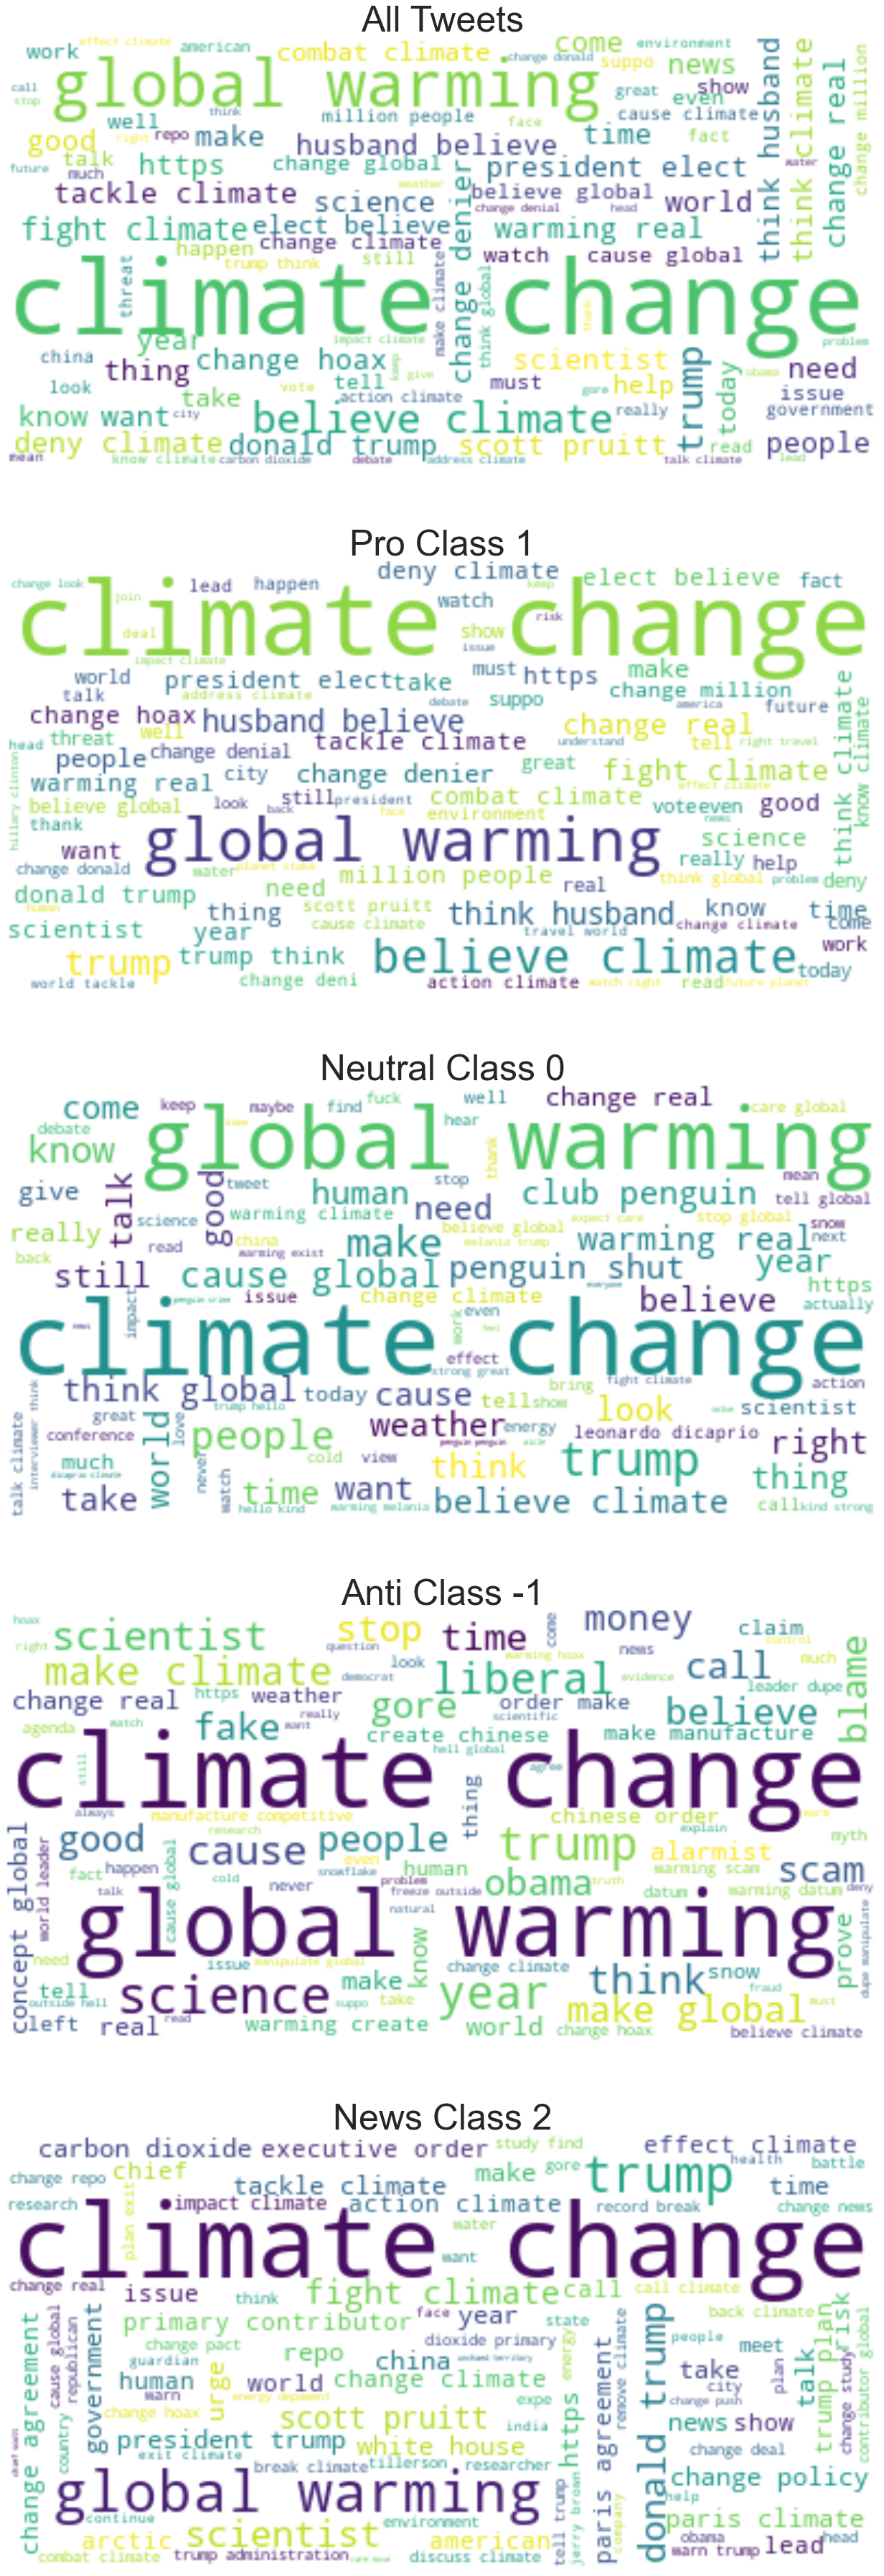

In [137]:
# visualising the messages with word cloud
df_senti1 = train_df[train_df['sentiment'] == 1]
df_senti0 = train_df[train_df['sentiment'] == 0]
df_senti_neg1 = train_df[train_df['sentiment'] == -1]
df_senti2 = train_df[train_df['sentiment'] == 2]
tweet_All = " ".join(review for review in train_df.detokenized_message)
tweet_senti1 = " ".join(review for review in df_senti1.detokenized_message)
tweet_senti0 = " ".join(review for review in df_senti0.detokenized_message)
tweet_senti_neg1 = " ".join(review for review in df_senti_neg1.detokenized_message)
tweet_senti2 = " ".join(review for review in df_senti2.detokenized_message)

fig, ax = plt.subplots(5, 1, figsize=(65, 65))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100,
                          background_color="white").generate(tweet_All)

wordcloud_1 = WordCloud(max_font_size=50, max_words=100,
                        background_color="white").generate(tweet_senti1)

wordcloud_0 = WordCloud(max_font_size=50, max_words=100,
                        background_color="white").generate(tweet_senti0)

wordcloud_neg1 = WordCloud(max_font_size=50, max_words=100,
                           background_color="white").generate(tweet_senti_neg1)

wordcloud_2 = WordCloud(max_font_size=50, max_words=100,
                        background_color="white").generate(tweet_senti2)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=50)
ax[0].axis('off')
ax[1].imshow(wordcloud_1, interpolation='bilinear')
ax[1].set_title('Pro Class 1', fontsize=50)
ax[1].axis('off')
ax[2].imshow(wordcloud_0, interpolation='bilinear')
ax[2].set_title('Neutral Class 0', fontsize=50)
ax[2].axis('off')
ax[3].imshow(wordcloud_neg1, interpolation='bilinear')
ax[3].set_title('Anti Class -1', fontsize=50)
ax[3].axis('off')
ax[4].imshow(wordcloud_2, interpolation='bilinear')
ax[4].set_title('News Class 2', fontsize=50)
ax[4].axis('off')

- After cleaning our text data another WordCloud visual was created for further analysis. Given that Donald `Trump` was president of USA, it is not surprising that his name is still the most common on all sentiments. 

<a id="five"></a>
## 5. Modeling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In this section we will be modelling our data. 

 ### 5.1 Modeling On Clean Data

In [138]:
#Defining our Data for X and Y
X_NB = train_df['detokenized_message']
y = train_df['sentiment']

In [139]:
X = train_df['message']
y = train_df['sentiment']

In [140]:
#vector = TfidfVectorizer(sublinear_tf=True)
vector = TfidfVectorizer(ngram_range=(1,2), min_df=2)
# X =vector.fit_transform(X_NB)
X =vector.fit_transform(X)

In [141]:
#Creating our pkl file
#model_save_path = "TfidfVectorizer.pkl"

#with open(model_save_path, 'wb') as file:
  #  pickle.dump(vector, file)

In [142]:
#Spliting our data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=41)

## Logistic regression classifier

In [143]:
#Initializing the Logistic regression model
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)

print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Testing accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.8636015325670499
Testing accuracy Score :  0.7484276729559748
              precision    recall  f1-score   support

          -1       0.30      0.75      0.43         4
           0       0.38      0.60      0.46        15
           1       0.89      0.76      0.82       106
           2       0.76      0.76      0.76        34

    accuracy                           0.75       159
   macro avg       0.58      0.72      0.62       159
weighted avg       0.80      0.75      0.77       159



C:\Users\Selaelo Debang\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [144]:
save_path = './logreg_regression_base_model.pkl'
pickle.dump(logreg, open(save_path,'wb'))

In [145]:
# Creating a pickle file for our Vectorizer
save_path = './Vectorizer.pkl'
pickle.dump(vector, open(save_path,'wb'))

In [146]:

#model_save_path = "Random_Forest_Classifier.pkl"

#with open(model_save_path, "wb") as file:
   # pickle.dump(logreg, file)

## Naive Bayes classifier

In [147]:
#Initializing the Naive Bayes model
naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)

NB_accuracy = accuracy_score(y_test,NB_prediction)

print("training accuracy Score: ", naiveByes_clf.score(X_train,y_train))
print("Testing accuracy Score : ", NB_accuracy )

print(classification_report(NB_prediction,y_test))

training accuracy Score:  0.7392081736909323
Testing accuracy Score :  0.7044025157232704
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.21      1.00      0.34         5
           1       0.97      0.68      0.80       130
           2       0.56      0.79      0.66        24

    accuracy                           0.70       159
   macro avg       0.43      0.62      0.45       159
weighted avg       0.88      0.70      0.76       159



C:\Users\Selaelo Debang\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Selaelo Debang\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Selaelo Debang\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

## Random forest classifier

In [148]:
#Initializing the Random Forest model
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)

print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Testing accuracy Score : ",rf_accuracy )

print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9987228607918263
Testing accuracy Score :  0.7295597484276729
              precision    recall  f1-score   support

          -1       0.10      1.00      0.18         1
           0       0.38      0.56      0.45        16
           1       0.89      0.73      0.80       111
           2       0.74      0.81      0.77        31

    accuracy                           0.73       159
   macro avg       0.53      0.77      0.55       159
weighted avg       0.80      0.73      0.76       159



## Linear Support Vector Classifier

In [149]:
#Initializing the Linear Support Vector model 

lsvc_clf = LinearSVC()

lsvc_clf.fit(X_train,y_train)

lsvc_prediction = lsvc_clf.predict(X_test)

lsvc_accuracy = accuracy_score(y_test,lsvc_prediction)

print("Training accuracy Score    : ",lsvc_clf.score(X_train,y_train))
print("Testing accuracy Score : ",lsvc_accuracy )

print(classification_report(lsvc_prediction,y_test))

Training accuracy Score    :  0.9890804597701149
Testing accuracy Score :  0.7672955974842768
              precision    recall  f1-score   support

          -1       0.30      0.60      0.40         5
           0       0.54      0.65      0.59        20
           1       0.86      0.80      0.83        98
           2       0.82      0.78      0.80        36

    accuracy                           0.77       159
   macro avg       0.63      0.71      0.65       159
weighted avg       0.79      0.77      0.78       159



## 5.2 Modeling on a balanced data
- Now, we build models on data that is balanced to check how best they can make predictions.
- From our EDA recall that we observed some imbalance in our data. We observed that our data was biased towards pro climate change activism. Now let us deal with that bias first before comparing our moldel's performance.

## Dealing with imbalanced data

### Downsampling Data

Here we ar redefining sentiments for downsampling

In [154]:
# Defining sentiments
Positive = train_df[train_df['sentiment'] == 1]
Negative = train_df[train_df['sentiment'] == -1]
Neutral = train_df[train_df['sentiment'] == 0]
News = train_df[train_df['sentiment'] == 2]
data = train_df.copy()
data['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

Here we are downsampling majority to match minority classes

In [155]:
# Pro sample without replacement, match minority class, reproduce results
Pro_downsampled = resample(Positive, replace=False,
                           n_samples=len(Negative), random_state=27)
# Neutral sample without replacement, match minority class, reproduce results
Neutral_downsampled = resample(Neutral, replace=False,
                               n_samples=len(Negative), random_state=27)
# News sample without replacement, match in minority class, reproduce results
News_downsampled = resample(News, replace=False, 
                            n_samples=len(Negative), random_state=27)
# Combine downsampled majority class with minority class
downsampled = pd.concat([Pro_downsampled, Neutral_downsampled,
                         News_downsampled, Negative])
downsampled['sentiment'].value_counts()

 1    1296
 0    1296
 2    1296
-1    1296
Name: sentiment, dtype: int64

We can see from the output above that our data has been successfully downsampled and it is finally BALANCED with all the sentiments having the same value of 1296.

## 5.3 Modeling on Downsampled Data

Now lets do modeling on downsampled data.

In [156]:
#Defining the X and Y variable
X_d = downsampled['detokenized_message']
y = downsampled['sentiment']

In [157]:
#vector = TfidfVectorizer(sublinear_tf=True)
vector = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X =vector.fit_transform(X_d)

In [158]:
#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

## Logistics Regression classifier

In [159]:
#Initializing the Logistic regression model
log_d = LogisticRegression()

log_d.fit(X_train, y_train)

log_d_prediction = log_d.predict(X_test)
log_d_accuracy = accuracy_score(y_test,log_d_prediction)

print("Training accuracy Score    : ",log_d.score(X_train,y_train))
print("Testing accuracy Score : ",log_d_accuracy )
print(classification_report(log_d_prediction,y_test))

Training accuracy Score    :  0.8641855027279813
Testing accuracy Score :  0.7307692307692307
              precision    recall  f1-score   support

          -1       0.89      0.76      0.82        21
           0       0.71      0.67      0.69        15
           1       0.58      0.78      0.67         9
           2       0.62      0.71      0.67         7

    accuracy                           0.73        52
   macro avg       0.70      0.73      0.71        52
weighted avg       0.75      0.73      0.74        52



C:\Users\Selaelo Debang\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [160]:
#import pickle 

#model_save_path = "Logistic_Regression_Classifier.pkl"

#with open(model_save_path, 'wb') as file:
   # pickle.dump(log_d_prediction, file)

## Naive Bayes classifier

In [161]:
#Initializing the Naive Bayes model

NB_DS = MultinomialNB()

NB_DS.fit(X_train,y_train)

NB_DS_pred = NB_DS.predict(X_test)

NB_DS_accuracy = accuracy_score(y_test,NB_DS_pred)

print("training accuracy Score: ", NB_DS.score(X_train,y_train))
print("Testing accuracy Score : ", NB_DS_accuracy )

print(classification_report(NB_DS_pred,y_test))

training accuracy Score:  0.8254091971940763
Testing accuracy Score :  0.6538461538461539
              precision    recall  f1-score   support

          -1       0.78      0.78      0.78        18
           0       0.57      0.57      0.57        14
           1       0.67      0.62      0.64        13
           2       0.50      0.57      0.53         7

    accuracy                           0.65        52
   macro avg       0.63      0.63      0.63        52
weighted avg       0.66      0.65      0.65        52



## Random Forest Classifier

In [162]:
#Initializing the Random Forest Classifier

RF_DS = RandomForestClassifier()

RF_DS.fit(X_train,y_train)

RF_DS_pred = RF_DS.predict(X_test)
RF_DS_accuracy = accuracy_score(y_test,RF_DS_pred)

print("Training accuracy Score    : ",RF_DS.score(X_train,y_train))
print("Testing accuracy Score : ",RF_DS_accuracy )

print(classification_report(RF_DS_pred,y_test))

Training accuracy Score    :  0.9933749025720966
Testing accuracy Score :  0.6153846153846154
              precision    recall  f1-score   support

          -1       0.67      0.80      0.73        15
           0       0.64      0.60      0.62        15
           1       0.42      0.42      0.42        12
           2       0.75      0.60      0.67        10

    accuracy                           0.62        52
   macro avg       0.62      0.60      0.61        52
weighted avg       0.62      0.62      0.61        52



## Linear Support Vector Classifier

In [163]:
#Initializing the Linear Support Vector Classifier

lsvc_DS_clf = LinearSVC()

lsvc_DS_clf.fit(X_train,y_train)

lsvc_DS_pred = lsvc_DS_clf.predict(X_test)

lsvc_DS_accuracy = accuracy_score(y_test,lsvc_DS_pred)

print("Training accuracy Score    : ",lsvc_DS_clf.score(X_train,y_train))
print("Testing accuracy Score : ",lsvc_DS_accuracy )

print(classification_report(lsvc_DS_pred,y_test))

Training accuracy Score    :  0.970381917381138
Testing accuracy Score :  0.6923076923076923
              precision    recall  f1-score   support

          -1       0.83      0.79      0.81        19
           0       0.71      0.67      0.69        15
           1       0.75      0.75      0.75        12
           2       0.25      0.33      0.29         6

    accuracy                           0.69        52
   macro avg       0.64      0.63      0.63        52
weighted avg       0.71      0.69      0.70        52



In [164]:
#model_save_path = "Linear_Support_Vector_Classifier.pkl"

#with open(model_save_path, 'wb') as file:
   # pickle.dump(lsvc_clf, file)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section we will be checking the performance of our models on balanced and imbalanced dataset. 

## Model Performances on Clean/Imbalanced data
Here we are comparing our models performance on an imbalanced dataset and see which model performs best.

In [81]:
models = pd.DataFrame({
    'Models': [ 'Logistic Regression ', 
              'Random Forest', 'Naive Bayes', 'Linear SVC'],
    'Test accuracy': [ logreg_accuracy, 
              rf_accuracy, NB_accuracy, lsvc_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

Models  Test accuracy
3            Linear SVC       0.767296
0  Logistic Regression        0.748428
1         Random Forest       0.742138
2           Naive Bayes       0.704403

## Model Performances on Downsampled/Balanced data
Here we are comparing our models performance on a balanced dataset and see which model performs best.

In [65]:
# Comparing the performance of the models on balanced data based on their test accuracy score
models = pd.DataFrame({
    'Model Downsampled': [ 'Logistic Regression ', 
              'Random Forest', 'Naive Bayes', 'Linear SVC'],
    'Test accuracy': [ log_d_accuracy, 
              RF_DS_accuracy, NB_DS_accuracy, lsvc_DS_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

Model Downsampled  Test accuracy
0  Logistic Regression        0.730769
3            Linear SVC       0.692308
2           Naive Bayes       0.653846
1         Random Forest       0.519231

- From the results above, we can see that using a downsampled sample, the minority classes were better predicted. 
- The accuracy of some models decreased significantly, while accuracy of others did not. 
- In terms of the F1-score, these models do well on the train data, but significantly worse on unseen data. It is important to note, however, that although the F1-score of the Logistics Regression decreased, it did not show a significant decrease in comparison to all the other models.
- The F1-score of the Logistics model moved from 0.75 to 0.73. Accordingly, the logistics model is the most appropriate for this project and future sentiment projects. 

In [171]:
#Transforming the target variable of our clean data
X_NB_test = test_df['detokenized_message']
X_test =vector.transform(X_NB_test)

In [172]:
X_test.shape

(10546, 6177)

Making Predictions on our **downsammpled/balanced data** using the Logistic regression model.

In [173]:
#Logistic regression model predictions
test_pred = log_d.predict(X_test)

test_df['sentiment'] = test_pred

subm = test_df[['tweetid','sentiment']]
subm.to_csv('sub.csv', index=False)
subm

tweetid  sentiment
0       169760          1
1        35326          2
2       224985          0
3       476263          1
4       872928          0
...        ...        ...
10541   895714          0
10542   875167          1
10543    78329          2
10544   867455          0
10545   470892          2

[10546 rows x 2 columns]

## Logging metrics to Comet

In [68]:
# Saving each metric to add to a dictionary for logging

f1 = f1_score(y_test,log_d_prediction, average='weighted')
precision = precision_score(y_test,log_d_prediction, average='weighted')
recall = recall_score(y_test,log_d_prediction, average='weighted')

# Create dictionaries for the data we want to log       
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision}

params= {'classifier': 'Logistics Regression',
         'ngram_range': '(1,2)',
         'vectorizer': 'CountVectorizer',
         'scaling': 'no',
         'resampling': 'no',
         'test_train random state': '0'}
  
# Log info on comet
experiment.log_metrics(metrics)
experiment.log_parameters(params)

# End experiment
experiment.end()

# Display results on comet page
experiment.display()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/debangselaelo/general/1119e3d0b7cb475b8ce2e4da4dfdd1c0
COMET INFO:   Metrics:
COMET INFO:     f1        : 0.726110317622254
COMET INFO:     precision : 0.7326007326007326
COMET INFO:     recall    : 0.7307692307692307
COMET INFO:   Parameters:
COMET INFO:     C                        : 1.0
COMET INFO:     alpha                    : 1.0
COMET INFO:     bootstrap                : True
COMET INFO:     ccp_alpha                : 0.0
COMET INFO:     class_prior              : 1
COMET INFO:     class_weight             : 1
COMET INFO:     classifier               : Logistics Regression
COMET INFO:     criterion                : gini
COMET INFO:     dual                     : True
COMET INFO:     fit_intercept            : True
COMET INFO:     fit_prior 

<a id="five"></a>
## 7. Model Explanation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Here we are explaining the model which performed best, that is, the **Logistic Regression Model**.

- Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.
- Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.
- Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.
- In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).
- The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.
- Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets.
- Logistic Regression can be used to classify the observations using different types of data and can easily determine the most effective variables used for the classification. 

## Conclusion
Several sentiment classification machine learning models were trained and tested on tweet data. The tweets were cleaned, pre-processed and the data was balanced using resampling.Training models and making Predictions using raw data was also tested against processed data. It was found that all models performed better using tweets in original form. Logistic Regression & SVC were the top performing model choices, with Logistics model producing the best f1-score on Kaggle. After visualing the tweets and exploring peoples view on climate change, the different the Logistics Regression model was able to show that people do believe in climate change and they do view it as a threat to their wellbeing and environment. Businesses have a duty to themselves and their customers to continue investing in technologies and manufacturing techniques that promotes environmentally sustainability. 